In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, Integer, String, insert, select

engine = create_engine("sqlite+pysqlite:///GPSdata1.db", echo=False)

metadata_obj = MetaData()

players_table = Table("players", metadata_obj, autoload_with=engine)
sessions_data_table = Table("sessions_data", metadata_obj, autoload_with=engine)

In [38]:
teams_dict = {}
with engine.connect() as conn:

    team_stm = (
        select(players_table.c.team)
        .group_by(players_table.c.team)
    )

    team_stm_result = conn.execute(team_stm)
    teams = team_stm_result.scalars().all()

for i, team in enumerate(teams):
    teams_dict[i] = team

teams_dict

positions_dict = {}
with engine.connect() as conn:

    positions_stm = (
        select(players_table.c.position)
        .group_by(players_table.c.position)
    )

    positions_stm_result = conn.execute(positions_stm)
    positions = positions_stm_result.scalars().all()

for i, position in enumerate(positions):
    positions_dict[i] = position

positions_dict

{0: 'CB', 1: 'CM', 2: 'FB', 3: 'FWD'}

In [ ]:
# data with outliers removed

measure = "HSR/min"
measures = sessions_data_table.columns
HSR_column = measures[measure]

with engine.connect() as conn:
    stmt = (
        select(players_table.c.team, players_table.c.position, HSR_column)
        .join(sessions_data_table, players_table.c.id == sessions_data_table.c.player_id)
        .order_by(players_table.c.team)
    )

    data = conn.execute(stmt).mappings().all()

df = pd.DataFrame(data)

# remove outliers
df = df[np.abs(stats.zscore(df[measure]) < 4)]

df

In [46]:
df[measure] < 4

0       True
1      False
2       True
3       True
4      False
       ...  
559    False
560    False
561    False
562    False
563    False
Name: HSR/min, Length: 564, dtype: bool

In [40]:
# Setting the color pallete
sns.set_palette("bright")

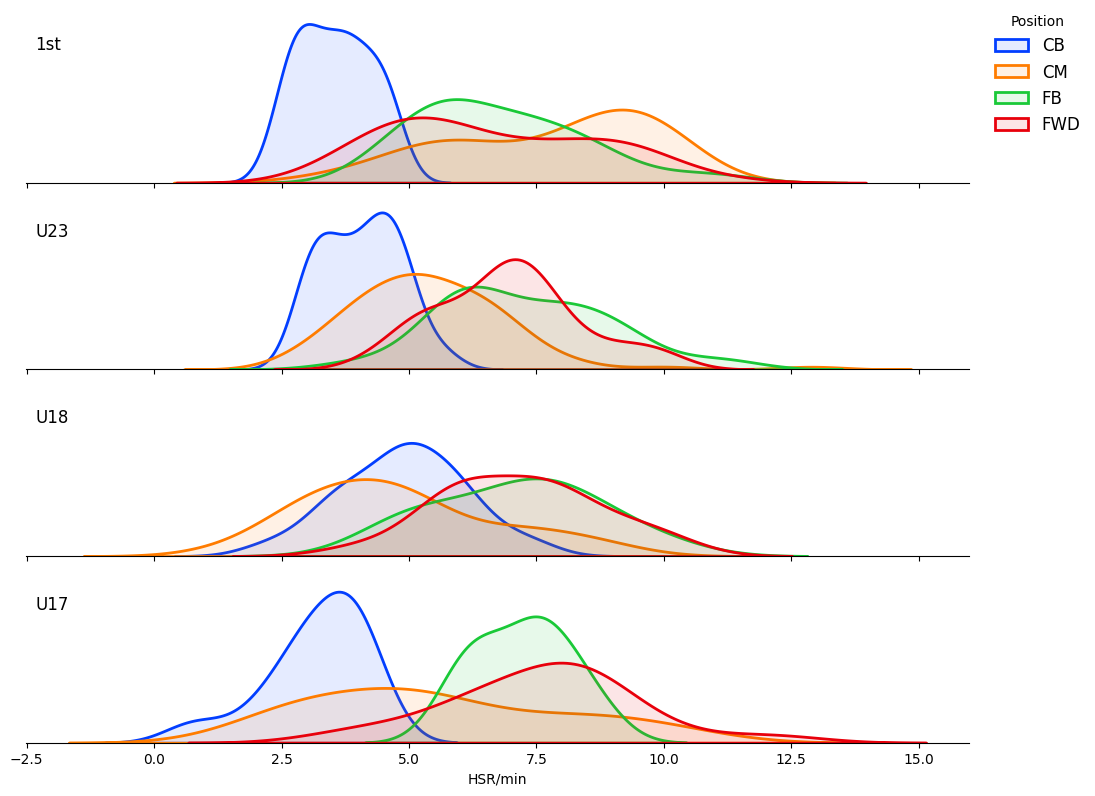

In [41]:
g = sns.FacetGrid(df, row="team", hue="position", row_order=["1st", "U23", "U18", "U17"], height=2, aspect=5)
g.map(sns.kdeplot, measure, bw_adjust=1, fill=True, alpha=.1, lw=2)

for i, ax in enumerate(g.axes.flat):
    ax.text(0.01, 0.8, g.row_names[i],
            fontsize=12, transform = ax.transAxes)
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)
g.add_legend(title="Position", loc="upper right", fontsize=12)
g.refline(y=0, linewidth=0.5, linestyle="-", color=None, clip_on=False)


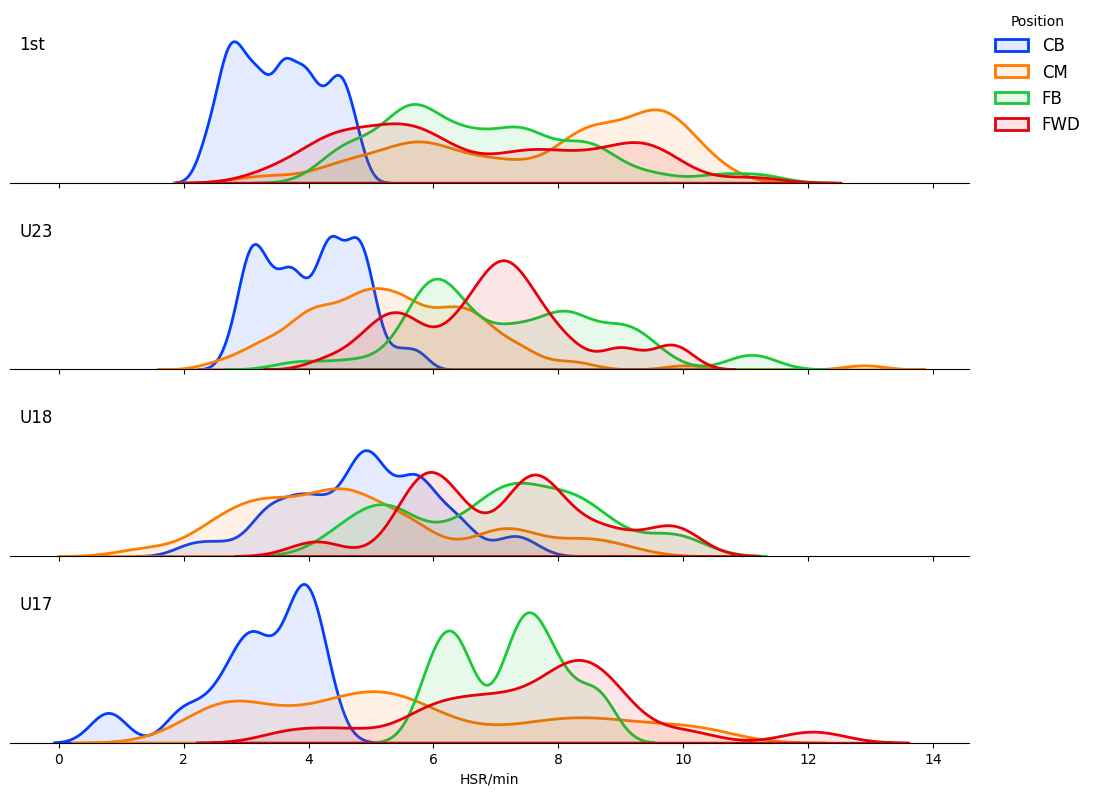

In [42]:
g = sns.FacetGrid(df, row="team", hue="position", row_order=["1st", "U23", "U18", "U17"], height=2, aspect=5)
g.map(sns.kdeplot, measure, bw_adjust=0.5, fill=True, alpha=.1, lw=2)

for i, ax in enumerate(g.axes.flat):
    ax.text(0.01, 0.8, g.row_names[i],
            fontsize=12, transform = ax.transAxes)
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)
g.add_legend(title="Position", loc="upper right", fontsize=12)
g.refline(y=0, linewidth=0.5, linestyle="-", color=None, clip_on=False)